In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

1. Reading the columns that are being worked with and filling in the NaNs with something workable.

In [2]:
hotel_csv = pd.read_csv("./Resources/hotel_bookings.csv")
agent_columns = ['distribution_channel', 'previous_cancellations', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'reservation_status']
agent_columns_df = hotel_csv[agent_columns]
agent_columns_df['agent'].fillna(0, inplace=True)
agent_columns_df['company'].fillna(0, inplace=True)
agent_columns_df.to_csv('agent_booking.csv', index=False)


C:\Users\sammy\AppData\Local\Temp\ipykernel_2784\3234497803.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_columns_df['agent'].fillna(0, inplace=True)
C:\Users\sammy\AppData\Local\Temp\ipykernel_2784\3234497803.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_columns_df['company'].fillna(0, inplace=True)


In [3]:
agent_csv = pd.read_csv("agent_booking.csv")
agent_csv['agent'] = agent_csv['agent'].astype(int)
agent_csv['company'] = agent_csv['company'].astype(int)
agent_csv.head(10)

,distribution_channel,previous_cancellations,booking_changes,agent,company,days_in_waiting_list,reservation_status
0,Direct,0,3,0,0,0,Check-Out
1,Direct,0,4,0,0,0,Check-Out
2,Direct,0,0,0,0,0,Check-Out
3,Corporate,0,0,304,0,0,Check-Out
4,TA/TO,0,0,240,0,0,Check-Out
5,TA/TO,0,0,240,0,0,Check-Out
6,Direct,0,0,0,0,0,Check-Out
7,Direct,0,0,303,0,0,Check-Out
8,TA/TO,0,0,240,0,0,Canceled
9,TA/TO,0,0,15,0,0,Canceled


2. Determines that most commonly used Agents by the Hotel to try to find direction on which sources to focus on.

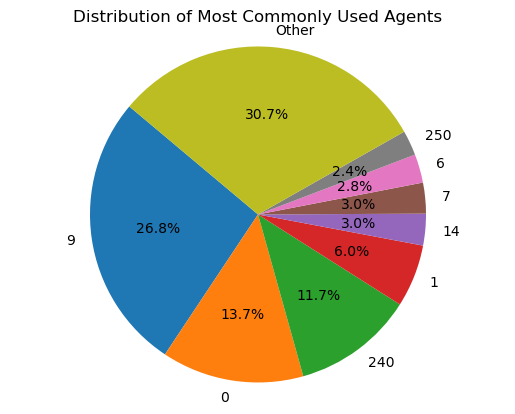

In [4]:

agent_value_counts = agent_csv['agent'].value_counts()
agent_dict = agent_value_counts.to_dict()

# Shows the agents above 2% of the total and groups the rest into an 'Other' section
agent_threshold = 2
total_sum = sum(agent_dict.values())
agent_filtered = {key: value for key, value in agent_dict.items() if (value / total_sum) * 100 >= agent_threshold}
agent_filtered_sum = sum(agent_filtered.values())
agent_filtered['Other'] = total_sum - agent_filtered_sum


plt.pie(agent_filtered.values(), labels=agent_filtered.keys(), autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Most Commonly Used Agents')
plt.savefig('Agent_Distribution.png')
plt.show()

3. Establish who amongst the most used Agents are the most successful to determine who to focus on expanding with in the future. Do this by separating their successes via "Check-Out" in reservation status, or failures with "Canceled" or "No-Show"

In [5]:
# consider guests that have checked out as a successful booking
successful_bookings = "Check-Out"
# consider guests that have canceled or no-showed as a failed booking
failed_bookings = "Canceled" or "No-Show"
# sets the agents that contributed to over 2% of the total bookings
agent_1 = 1
agent_9 = 9
agent_240 = 240
agent_14 = 14
agent_7 = 7
agent_6 = 6
agent_250 = 250
# agent 0 are the ones that used no agents
agent_0 = 0

# Gets a value_count of all the Agents that are above 2% of the total
agent_1_success = agent_csv[(agent_csv['agent'] == agent_1) & (agent_csv['reservation_status'] == successful_bookings)]
agent_1_success_value_count = agent_1_success.shape[0]

agent_1_failure = agent_csv[(agent_csv['agent'] == agent_1) & (agent_csv['reservation_status'] == failed_bookings)]
agent_1_failure_value_count = agent_1_failure.shape[0]

agent_9_success = agent_csv[(agent_csv['agent'] == agent_9) & (agent_csv['reservation_status'] == successful_bookings)]
agent_9_success_value_count = agent_9_success.shape[0]

agent_9_failure = agent_csv[(agent_csv['agent'] == agent_9) & (agent_csv['reservation_status'] == failed_bookings)]
agent_9_failure_value_count = agent_9_failure.shape[0]

agent_0_success = agent_csv[(agent_csv['agent'] == agent_0) & (agent_csv['reservation_status'] == successful_bookings)]
agent_0_success_value_count = agent_0_success.shape[0]


agent_0_failure = agent_csv[(agent_csv['agent'] == agent_0) & (agent_csv['reservation_status'] == failed_bookings)]
agent_0_failure_value_count = agent_0_failure.shape[0]

agent_240_success = agent_csv[(agent_csv['agent'] == agent_240) & (agent_csv['reservation_status'] == successful_bookings)]
agent_240_success_value_count = agent_240_success.shape[0]

agent_240_failure = agent_csv[(agent_csv['agent'] == agent_240) & (agent_csv['reservation_status'] == failed_bookings)]
agent_240_failure_value_count = agent_240_failure.shape[0]

agent_14_success = agent_csv[(agent_csv['agent'] == agent_14) & (agent_csv['reservation_status'] == successful_bookings)]
agent_14_success_value_count = agent_14_success.shape[0]

agent_14_failure = agent_csv[(agent_csv['agent'] == agent_14) & (agent_csv['reservation_status'] == failed_bookings)]
agent_14_failure_value_count = agent_14_failure.shape[0]

agent_7_success = agent_csv[(agent_csv['agent'] == agent_7) & (agent_csv['reservation_status'] == successful_bookings)]
agent_7_success_value_count = agent_7_success.shape[0]

agent_7_failure = agent_csv[(agent_csv['agent'] == agent_7) & (agent_csv['reservation_status'] == failed_bookings)]
agent_7_failure_value_count = agent_7_failure.shape[0]

agent_6_success = agent_csv[(agent_csv['agent'] == agent_6) & (agent_csv['reservation_status'] == successful_bookings)]
agent_6_success_value_count = agent_6_success.shape[0]

agent_6_failure = agent_csv[(agent_csv['agent'] == agent_6) & (agent_csv['reservation_status'] == failed_bookings)]
agent_6_failure_value_count = agent_6_failure.shape[0]

agent_250_success = agent_csv[(agent_csv['agent'] == agent_250) & (agent_csv['reservation_status'] == successful_bookings)]
agent_250_success_value_count = agent_250_success.shape[0]

agent_250_failure = agent_csv[(agent_csv['agent'] == agent_250) & (agent_csv['reservation_status'] == failed_bookings)]
agent_250_failure_value_count = agent_250_failure.shape[0]

other_agents_df_success = agent_csv[~agent_csv['agent'].isin([agent_0, agent_1, agent_6, agent_7, agent_9, agent_14, agent_240, agent_250])
                                    & (agent_csv['reservation_status'] == successful_bookings)]
other_agents_success_value_count = other_agents_df_success.shape[0]


# Gets a value_count of all the other Agents

other_agents_df_failure = agent_csv[~agent_csv['agent'].isin([agent_0, agent_1, agent_6, agent_7, agent_0, agent_14, agent_240, agent_250])
                                    & (agent_csv['reservation_status'] == failed_bookings)]
other_agents_failure_value_count = other_agents_df_failure.shape[0]

# print(f"Other Agent's Failures are {other_agents_failure_value_count}")


4. Determine the rate of success of the most commonly used Agents with the aim of finding out if they are worth using over others.

Percentage of Agent Direct Success:  76.29%
Percentage of Agent 1 Success:  26.57%
Percentage of Agent 6 Success:  69.01%
Percentage of Agent 7 Success:  87.30%
Percentage of Agent 9 Success:  59.19%
Percentage of Agent 14 Success:  84.07%
Percentage of Agent 240 Success:  61.05%
Percentage of Agent 250 Success:  83.05%
Percentage of Agent Other Success:  47.07%


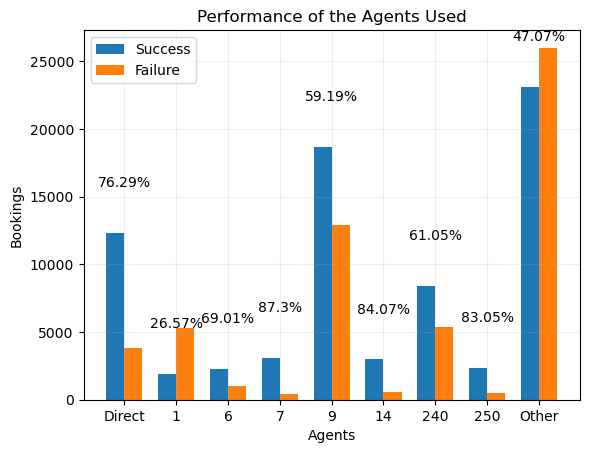

In [18]:
# Makes a dictionary from the previously obtained value counts
agent_success_dict = {'Direct':agent_0_success_value_count, '1':agent_1_success_value_count, '6':agent_6_success_value_count, '7':agent_7_success_value_count,
                      '9':agent_9_success_value_count, '14':agent_14_success_value_count, '240':agent_240_success_value_count, '250':agent_250_success_value_count,
                      'Other':other_agents_success_value_count}
agent_failure_dict = {'Direct':agent_0_failure_value_count, '1':agent_1_failure_value_count, '6':agent_6_failure_value_count, '7':agent_7_failure_value_count,
                      '9':agent_9_failure_value_count, '14':agent_14_failure_value_count, '240':agent_240_failure_value_count, '250':agent_250_failure_value_count,
                      'Other':other_agents_failure_value_count}
agent_success_list = [agent_0_success_value_count, agent_1_success_value_count, agent_6_success_value_count, agent_7_success_value_count,
                      agent_9_success_value_count, agent_14_success_value_count, agent_240_success_value_count, agent_250_success_value_count,
                      other_agents_success_value_count]
agent_failure_list = [agent_0_failure_value_count, agent_1_failure_value_count, agent_6_failure_value_count, agent_7_failure_value_count,
                      agent_9_failure_value_count, agent_14_failure_value_count, agent_240_failure_value_count, agent_250_failure_value_count,
                      other_agents_failure_value_count]
# Gets the X and Y values for the successful bookings to use in the chart
agent_success_keys = agent_success_dict.keys()
agent_success_values = agent_success_dict.values()

# Gets the X and Y values for the failed bookings to use in the chart
agent_failure_keys = agent_failure_dict.keys()
agent_failure_values = agent_failure_dict.values()

# Plotting the data on a bar graph
agent_x_axis = np.arange(len(agent_success_keys))
bar_width = 0.35
agent_tick_locations = [value for value in agent_x_axis]

success_percentage_list = []
for value1, value2, key1 in zip(agent_success_dict.values(), agent_failure_dict.values(), agent_success_dict.keys()):
    success_percentage = round((value1/(value1 + value2)) * 100, 2)
    success_percentage_list.append(success_percentage)
    print(f"Percentage of Agent {key1} Success: {success_percentage: .2f}%")

for i in range(len(agent_success_keys)):
    plt.text(i, agent_success_list[i] + 3400, f"{success_percentage_list[i]}%", ha='center')

plt.xticks(agent_tick_locations, agent_success_keys)
plt.bar(agent_x_axis - bar_width/2, agent_success_values, bar_width, label='Success')
plt.bar(agent_x_axis + bar_width/2, agent_failure_values, bar_width, label='Failure')
plt.legend()
plt.xlabel('Agents')
plt.ylabel('Bookings')
plt.title('Performance of the Agents Used')
plt.grid(alpha=0.2)
plt.savefig('Agent_Performance.png')
plt.show()


5. Observations:
- Agent 9 was the independent agent with the greatest volume of customers and boasts a positive success rate. They are a valuable asset to continue working with.
- Agent 1 had the third most customers with a staggeringly low success rate. They should be evaluated upon further to determine if it is worth continuing the relationship
- Agents 7, 14, and 250 are performing exceedingly, but their volume is low right now. Futher expanding on collaborations with them can bring in more bookings
- The less frequently used Agents all grouped up in the "Other" category while having a negative success rate overall, they bring in a significant portion of the overall bookings where it can be overlooked to continue bringing in potential customers.
- The people that book with the hotel directly very infrequently cancel their booking, so direct advertisement to potential visitors can be looked at as an option for the future.

6. The following is the distribution of the various channels that the Hotel uses to book customers. 

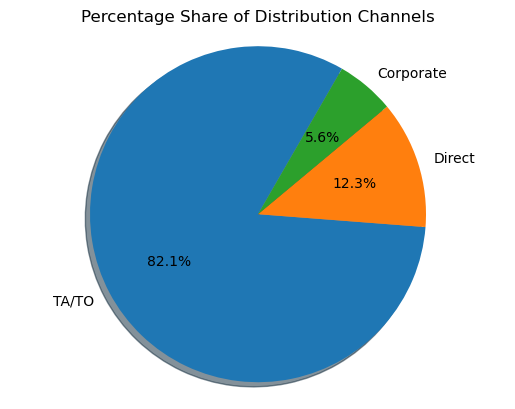

In [7]:
dchannel_value_counts = agent_csv['distribution_channel'].value_counts()
dchannel_dict = dchannel_value_counts.to_dict()

dchannel_keys = dchannel_dict.keys()
dchannel_values = dchannel_dict.values()

# Filtering out the less than 1% of insignificant data
dchannel_threshold = 5
total_dchannel_sum = sum(dchannel_values)
filtered_dchannel_values = [value for value in dchannel_values if (value / total_dchannel_sum) * 100 >= dchannel_threshold]
filtered_labels = [label for value, label in zip(dchannel_values, dchannel_keys) if (value / total_dchannel_sum) * 100 >= dchannel_threshold]

plt.pie(filtered_dchannel_values, labels=filtered_labels, autopct='%1.1f%%', startangle=60, shadow=True)
plt.axis('equal')
plt.title('Percentage Share of Distribution Channels')
plt.savefig('Dchannel_Distribution.png')
plt.show()

7. Observations: 
- Travel Agents and Tour Organizers are by far the most common distribution channel, followed by Direct bookings.

8. A stacked bar graph to visualize the success rates of the distribution channels against each other.

In [8]:
# Making a list for the successes/failures of distribution channels
dchannel_1 = 'TA/TO'
dchannel_2 = 'Direct'
dchannel_3 = 'Corporate'

dchannel_1_success = agent_csv[(agent_csv['distribution_channel'] == dchannel_1) & (agent_csv['reservation_status'] == successful_bookings)]
dchannel_1_success_value_count = dchannel_1_success.shape[0]

dchannel_1_failure = agent_csv[(agent_csv['distribution_channel'] == dchannel_1) & (agent_csv['reservation_status'] == failed_bookings)]
dchannel_1_failure_value_count = dchannel_1_failure.shape[0]

dchannel_2_success = agent_csv[(agent_csv['distribution_channel'] == dchannel_2) & (agent_csv['reservation_status'] == successful_bookings)]
dchannel_2_success_value_count = dchannel_2_success.shape[0]

dchannel_2_failure = agent_csv[(agent_csv['distribution_channel'] == dchannel_2) & (agent_csv['reservation_status'] == failed_bookings)]
dchannel_2_failure_value_count = dchannel_2_failure.shape[0]

dchannel_3_success = agent_csv[(agent_csv['distribution_channel'] == dchannel_3) & (agent_csv['reservation_status'] == successful_bookings)]
dchannel_3_success_value_count = dchannel_3_success.shape[0]

dchannel_3_failure = agent_csv[(agent_csv['distribution_channel'] == dchannel_3) & (agent_csv['reservation_status'] == failed_bookings)]
dchannel_3_failure_value_count = dchannel_3_failure.shape[0]


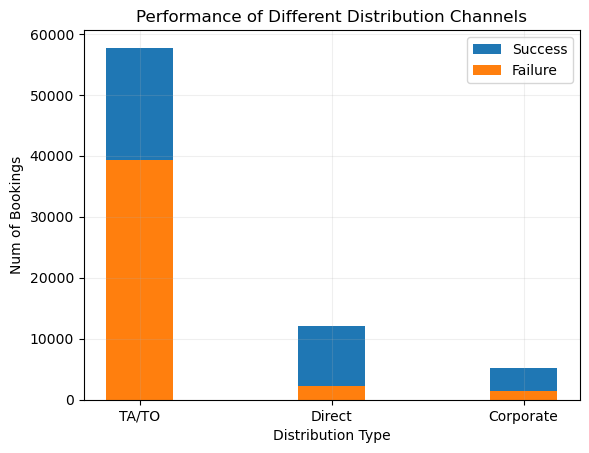

In [9]:
dchannel_key_list = [dchannel_1, dchannel_2, dchannel_3]
dchannel_success_value_list = [dchannel_1_success_value_count, dchannel_2_success_value_count, dchannel_3_success_value_count]
dchannel_failure_value_list = [dchannel_1_failure_value_count, dchannel_2_failure_value_count, dchannel_3_failure_value_count]

bar_width = 0.35
plt.bar(dchannel_key_list, dchannel_success_value_list, width=bar_width, label='Success')
plt.bar(dchannel_key_list, dchannel_failure_value_list, width=bar_width, label='Failure')

plt.xlabel('Distribution Type')
plt.ylabel('Num of Bookings')
plt.title('Performance of Different Distribution Channels')
plt.legend()
plt.grid(alpha=0.2)
plt.savefig('Dchannel_Performance.png')
plt.show()

Observations: 
- Overall, travel agents and tour organizers consist of the majority of the share.